In [1]:
import pandas as pd
import onsetsync

### Load Data

In [2]:
filepath = 'example_data/CSS_Song2.csv'
CSS_Song2 = pd.read_csv(filepath)
#print(CSS_Song2.head())

### Read Data

In [3]:
columns = ['Piece', 'Section', 'Label.SD','Clave','Bass','Guitar','Tres', 'SD', 'Cycle', 'Isochronous.SD.Time']
df = CSS_Song2[columns]
print(df.head())

    Piece Section Label.SD  Clave      Bass    Guitar      Tres  SD  Cycle  \
0  Song_2     Son      1:1    NaN       NaN       NaN       NaN   1      1   
1  Song_2     Son      1:2    NaN       NaN  5.281932       NaN   2      1   
2  Song_2     Son      1:3    NaN       NaN  5.480643       NaN   3      1   
3  Song_2     Son      1:4    NaN  5.714555  5.707537  5.730943   4      1   
4  Song_2     Son      1:5    NaN  5.927078  5.939071  5.917083   5      1   

   Isochronous.SD.Time  
0             5.037333  
1             5.260062  
2             5.482792  
3             5.705521  
4             5.928250  


### Summarise Onsets

In [4]:
summary = onsetsync.summarise_onsets(df=df, instr=['Clave','Bass','Guitar','Tres','Isochronous.SD.Time'], plot=False)
summary.round(1)

,N,Md,M,SD,Min,Max
Clave,486,666.4,703.6,173.7,192.0,1558.1
Bass,486,471.4,708.1,431.5,180.0,1985.2
Guitar,1401,223.6,244.5,91.4,175.1,1694.9
Tres,906,245.0,371.4,234.4,147.1,1986.5
Isochronous.SD.Time,1567,220.4,220.1,2.9,212.8,226.6


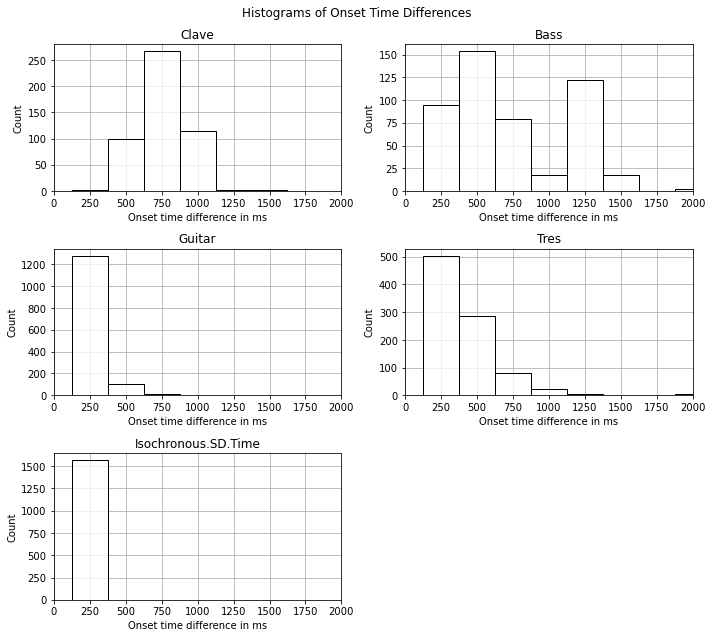

In [5]:
summary = onsetsync.summarise_onsets(df=df, instr=['Clave','Bass','Guitar','Tres','Isochronous.SD.Time'], plot=True)

### Analysis of Synchrony

#### Fig 1

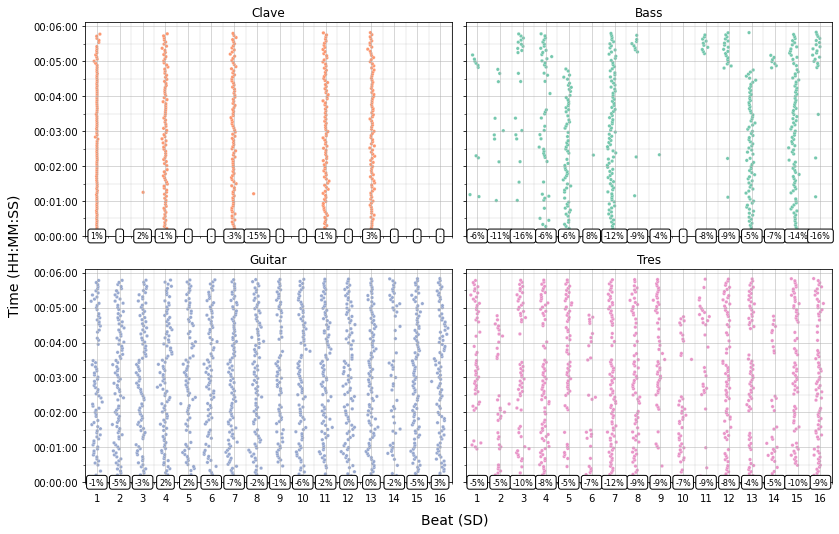

In [6]:
instr=['Clave','Bass','Guitar','Tres']
beat = 'SD'
virtual = 'Isochronous.SD.Time'

onsetsync.plot_by_beat(df=df, instr=instr, beat=beat, virtual=virtual, pcols=2, griddeviations=True, colourpalette='Set2')


#### Fig 2

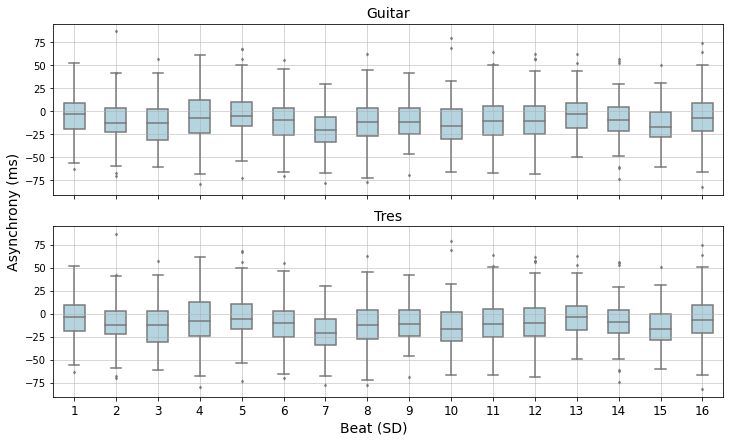

In [7]:
instr=['Guitar', 'Tres']
beat = 'SD'
virtual = 'Isochronous.SD.Time'

onsetsync.boxplot_by_beat(df=df, instr=instr, beat=beat, virtual=virtual, pcols=1, color='lightblue')


### Synchrony between instruments

#### Specific Instrument Pairs

In [8]:
# Calculate the number of joint onsets between two instruments

njoint = onsetsync.sync_joint_onsets(df=df, instr1='Guitar', instr2='Tres')
print(njoint)

853


In [9]:
# Samples and analyzes asynchronies between two instruments' onsets

d1_df = onsetsync.sync_sample_paired(df, instr1="Guitar", instr2="Tres", n=0, bootn=1, beat="SD", verbose=True)

# Compute the summaries and round to 5 decimal places
summary = {
    'N': len(d1_df),
    'Mean.ms': round(d1_df['asynch'].mean() * 1000, 5),
    'Sd.ms': round(d1_df['asynch'].std() * 1000, 5)
}

print(summary)

onsets in common: 853
take all onsets: 853
{'N': 853, 'Mean.ms': 12.53126, 'Sd.ms': 26.74134}


#### Multiple Instruments Pair-wise Asynchronies

In [10]:
# Calculate asynchronies across all pairs of instruments

d2_df = onsetsync.sync_execute_pairs(df, instruments=["Clave","Bass","Guitar","Tres"], n=0, bootn=1, beat='SD')
print(d2_df['asynch'].head())
print(d2_df['beatL'].head())

   Clave-Bass  Clave-Guitar  Clave-Tres  Bass-Guitar  Bass-Tres  Guitar-Tres
0    0.028350      0.008825    0.051242    -0.003473  -0.017095     0.054061
1    0.042582     -0.002505   -0.000508    -0.045598   0.013976     0.036369
2    0.018320      0.002090    0.016982     0.001193  -0.051240    -0.046010
3    0.028673     -0.002493    0.009277     0.006619  -0.023970     0.005413
4   -0.002380      0.001588    0.038961    -0.033832  -0.015180    -0.030173
   Clave-Bass  Clave-Guitar  Clave-Tres  Bass-Guitar  Bass-Tres  Guitar-Tres
0         4.0           1.0        11.0          3.0       13.0           10
1         7.0           4.0         1.0         12.0        4.0            9
2        13.0           3.0         1.0         13.0        7.0           10
3        13.0          13.0         4.0          5.0       15.0            1
4         1.0           1.0         7.0          4.0       12.0           16


#### Fig 3

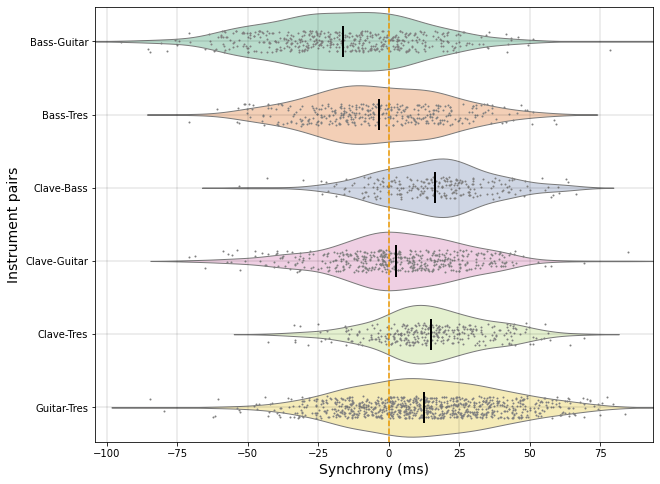

In [11]:
# Violin plot of asynchronies by instrument pair

onsetsync.plot_by_pair(df=d2_df, bybeat=False, reference=0, colourpalette='Pastel2')

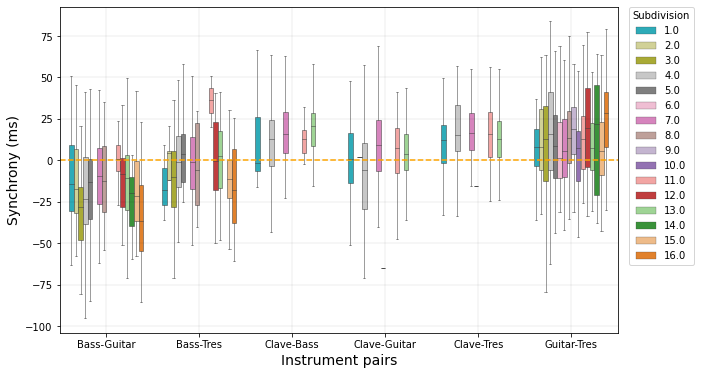

In [12]:
# Boxplot of asynchronies by instrument pair and beat level

onsetsync.plot_by_pair(df=d2_df, bybeat=True, reference=0, colourpalette='tab20_r')

### Plain Summaries of Asynchronies

#### Reporting of several measures of absolute asynchronies

In [13]:
d3_df = onsetsync.sync_sample_paired(df=df, instr1="Clave", instr2="Bass", beat="SD")

# summarize the asynchronies

d4_df = onsetsync.summarise_sync(df=d3_df)
print(d4_df)

   Pairwise asynchronization  Mean absolute asynchrony  \
0                  19.545687                 20.664398   

   Mean pairwise asynchrony  
0                  16.23288  


#### Relative measure for one instrument vs other other instruments.

In [14]:
# Example 1 : Bass vs All instruments
d5_df = onsetsync.sync_sample_paired_relative(df=df, instr='Bass', instr_ref=['Guitar','Bass','Tres','Clave'], beat='SD')
print('Bass vs All Instruments\n',d5_df)

# Example 2: Clave vs All instruments
d6_df = onsetsync.sync_sample_paired_relative(df=df, instr='Clave', instr_ref=['Guitar','Bass','Tres','Clave'], beat='SD')
print('\nClave vs All Instruments\n',d6_df)

Bass vs All Instruments
    Pairwise asynchronization  Mean absolute asynchrony  \
0                  13.883176                 12.961625   

   Mean pairwise asynchrony  
0                 -8.372744  

Clave vs All Instruments
    Pairwise asynchronization  Mean absolute asynchrony  \
0                  11.827724                 10.403843   

   Mean pairwise asynchrony  
0                  5.381136  


#### Asynchrony across beat subdivisions

In [ ]:
d7_df = onsetsync.sync_execute_pairs(df, instruments=['Guitar','Tres'], beat='SD')

# Calculate summary statistics for asynchronies by instrument pairs and beat level
d8_df = onsetsync.summarise_sync_by_pair(d7_df, bybeat=True, adjust=True)
d8_df


,Subdivision,N,M,SD,T,pval
0,1,48,5.03446,21.86708,1.59508,>0.999
1,2,34,9.98359,29.59437,1.96706,0.922
2,3,56,9.27614,32.68776,2.12362,0.612
3,4,76,17.35905,31.62904,4.78461,<0.001
4,5,52,10.10748,23.25047,3.13482,0.046
5,6,26,8.76592,27.32327,1.63588,>0.999
6,7,83,7.53027,25.72852,2.66646,0.148
7,8,70,14.50811,26.98793,4.49770,<0.001
8,9,44,17.52623,18.85664,6.16525,<0.001
9,10,41,5.28876,24.67663,1.37233,>0.999
